In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)


In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


###ETAPA 1 VISUALIZACION DE LOS DATOS

In [5]:
df =pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df['CustomerID'].isnull().sum()
#el codigo anterior me da la info y me cuenta los NO NULOS, por eso customerid tiene menos registros ya que solo cuenta los que tienen datos no los nulos o vacios

np.int64(135080)

In [8]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [9]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [10]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)


,0
CustomerID,24.926694
Description,0.268311
StockCode,0.000000
InvoiceNo,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
Country,0.000000


In [11]:
df.duplicated().sum()


np.int64(5268)

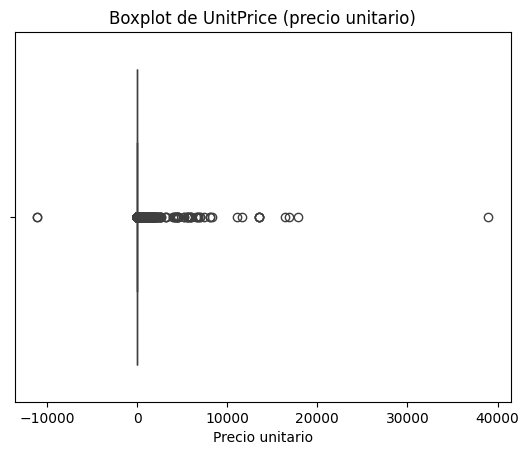

In [11]:
# Distribución de precios unitarios
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot de UnitPrice (precio unitario)')
plt.xlabel('Precio unitario')
plt.show()


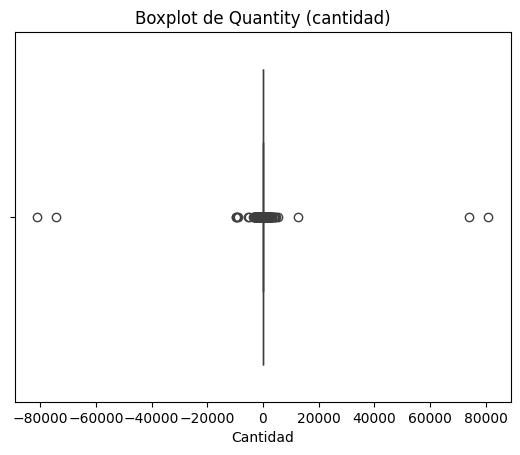

In [12]:
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot de Quantity (cantidad)')
plt.xlabel('Cantidad')
plt.show()


In [13]:
# Ver si facturas con UnitPrice negativo comienzan con 'C'
df[df['UnitPrice'] < 0]['InvoiceNo'].astype(str).str.startswith('C').value_counts()


,count
InvoiceNo,
False,2


In [14]:
# ¿Coinciden UnitPrice negativos con Quantity negativos?
df[(df['Quantity'] < 0)][['InvoiceNo', 'UnitPrice', 'Quantity']].head()


,InvoiceNo,UnitPrice,Quantity
141,C536379,27.50,-1
154,C536383,4.65,-1
235,C536391,1.65,-12
236,C536391,0.29,-24
237,C536391,0.29,-24


In [15]:
# Convertir a datetime si aún no lo hiciste
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Mostrar fecha mínima y máxima
print("Rango de fechas:", df['InvoiceDate'].min(), "→", df['InvoiceDate'].max())


Rango de fechas: 2010-12-01 08:26:00 → 2011-12-09 12:50:00


In [16]:
# Países únicos y sus frecuencias
print("Cantidad de países distintos:", df['Country'].nunique())
print(df['Country'].value_counts().head(10))  # Top 10 países


Cantidad de países distintos: 38
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64


In [17]:
# Top productos por cantidad total vendida
top_productos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_productos)


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


In [18]:
# ¿Qué pasa con las devoluciones (Quantity < 0)?
devoluciones = df[df['Quantity'] < 0]
print("Devoluciones registradas:", len(devoluciones))
print("Ejemplo:", devoluciones[['InvoiceNo', 'Quantity', 'Description']].head())

# Filas con Description nula
desc_nula = df[df['Description'].isnull()]
print("Filas sin descripción:", len(desc_nula))
print(desc_nula.head())

# Filas con CustomerID nulo
cliente_nulo = df[df['CustomerID'].isnull()]
print("Filas sin CustomerID:", len(cliente_nulo))
print(cliente_nulo.head())


Devoluciones registradas: 10624
Ejemplo:     InvoiceNo  Quantity                       Description
141   C536379        -1                          Discount
154   C536383        -1   SET OF 3 COLOURED  FLYING DUCKS
235   C536391       -12    PLASTERS IN TIN CIRCUS PARADE 
236   C536391       -24  PACK OF 12 PINK PAISLEY TISSUES 
237   C536391       -24  PACK OF 12 BLUE PAISLEY TISSUES 
Filas sin descripción: 1454
     InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56 2010-12-01 11:52:00        0.0   
1970    536545     21134         NaN         1 2010-12-01 14:32:00        0.0   
1971    536546     22145         NaN         1 2010-12-01 14:33:00        0.0   
1972    536547     37509         NaN         1 2010-12-01 14:33:00        0.0   
1987    536549    85226A         NaN         1 2010-12-01 14:34:00        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United K

###ETAPA 2 LIMPIEZA DE DATOS


In [19]:
#Vamos a primero eliminar las filas en donde la columna description venga nula
# Ver cuántas filas había antes
print("Antes de eliminar:", len(df))

# Eliminar filas con Description nulo
df = df[~df['Description'].isnull()]

# Ver cuántas quedaron
print("Después de eliminar:", len(df))

print(541909-540455)


Antes de eliminar: 541909
Después de eliminar: 540455
1454


In [20]:
#Para todos los valores nulos de CustomerID les asignamos el valor 99999 para asi poder identificarlos y que no se pierdan esos registros
# Reemplazar los valores nulos de CustomerID por un valor ficticio
df['CustomerID'] = df['CustomerID'].fillna(99999)


In [21]:
#Ahora transformamos la columna CustomerID a string para poder trabajar con ella
# Convertir CustomerID a tipo string (object), ya que lo trataremos como etiqueta
df['CustomerID'] = df['CustomerID'].astype(str)


In [22]:
#Verificamos lo generado en los codigos anteriores
# ¿Aparece 99999 como cliente?
df['CustomerID'].value_counts().head()


,count
CustomerID,
99999.0,133626
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  object        
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.1+ MB


In [26]:
# Ver cuántas filas duplicadas hay (exactas)
duplicados = df.duplicated().sum()
print("Filas duplicadas:", duplicados)


Filas duplicadas: 0


In [25]:
# Eliminar duplicados
df = df.drop_duplicates()

# Confirmar nuevo tamaño del DataFrame
print("Filas después de eliminar duplicados:", len(df))

Filas después de eliminar duplicados: 535187


In [27]:
# Crear la columna de precio total por línea
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [28]:
print("Valores de TotalPrice:")
print(df['TotalPrice'].describe())

Valores de TotalPrice:
count    535187.000000
mean         18.173100
std         381.171824
min     -168469.600000
25%           3.750000
50%           9.900000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64


In [29]:
df[['Quantity', 'UnitPrice', 'TotalPrice']].head()

,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [30]:
# Extraer solo la fecha (sin hora)
df['Fecha'] = df['InvoiceDate'].dt.date

In [31]:
# Extraer año, mes y nombre del día
df['Año'] = df['InvoiceDate'].dt.year
df['Mes'] = df['InvoiceDate'].dt.month
df['DíaSemana'] = df['InvoiceDate'].dt.day_name()
df['Hora'] = df['InvoiceDate'].dt.hour

In [32]:
# Crear columna combinada Año-Mes para análisis mensual
df['AñoMes'] = df['InvoiceDate'].dt.to_period('M').astype(str)

In [40]:
df[['InvoiceDate', 'Fecha', 'Año', 'Mes', 'AñoMes', 'DíaSemana', 'Hora']].head()

,InvoiceDate,Fecha,Año,Mes,AñoMes,DíaSemana,Hora
0,2010-12-01 08:26:00,2010-12-01,2010,12,2010-12,Wednesday,8
1,2010-12-01 08:26:00,2010-12-01,2010,12,2010-12,Wednesday,8
2,2010-12-01 08:26:00,2010-12-01,2010,12,2010-12,Wednesday,8
3,2010-12-01 08:26:00,2010-12-01,2010,12,2010-12,Wednesday,8
4,2010-12-01 08:26:00,2010-12-01,2010,12,2010-12,Wednesday,8
